In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("CBS_2021-2023_Full .csv")

In [3]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

In [4]:
# Drop all rows with any NaN values
df= df.dropna()

In [5]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [6]:
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [7]:
df['Month'] = df['started_at'].dt.strftime('%B')
df["year"]=df["started_at"].dt.year
df["start_hour"]=df["started_at"].dt.hour
df["end_hour"]=df["ended_at"].dt.hour
df["day"] = df["started_at"].dt.day
df["day of week"] = df["started_at"].dt.strftime("%A")
df["date_is_weekend"] = np.where(df["day of week"].isin([5, 6]),1,0)

In [8]:
# Calculate trip duration in seconds
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()

In [9]:
df['time_of_day'] = df['start_hour'].apply(lambda value: 'Morning' if value in (4,5,6,7,8,9,10,11)
                                                        else 'Afternoon' if value in (12,13,14,15,16)
                                                        else 'Evening' if value in (17,18,19,20,21) 
                                                        else 'Night')

df['time_of_day'] = pd.Categorical(df['time_of_day'],
categories=["Morning","Afternoon","Evening","Night"])

In [10]:
# Calculate total rides
total_rides = len(df)

# Calculate casual rides
casual_rides = len(df[df['member_casual'] == 'casual'])

# Calculate casual rider percentage
casual_rider_percentage = (casual_rides / total_rides) * 100

print(f"Casual Rider Percentage: {casual_rider_percentage:.2f}%")

Casual Rider Percentage: 39.37%


In [11]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        'Autumn'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
df['Season'] = df['Month'].apply(get_season)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Month,year,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,Season
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,January,2021,0,0,1,Friday,0,1520.0,Night,Winter
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,January,2021,0,0,1,Friday,0,853.0,Night,Winter
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,January,2021,0,0,1,Friday,0,335.0,Night,Winter
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,January,2021,0,0,1,Friday,0,194.0,Night,Winter
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,...,January,2021,0,0,1,Friday,0,1042.0,Night,Winter


In [12]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend', 'trip_duration', 'time_of_day',
       'Season'],
      dtype='object')

In [13]:
rides_per_month = df.groupby(['year', 'Month'])['trip_duration'].sum().reset_index()
rides_by_user = df.groupby('member_casual')['trip_duration'].sum()
hourly_usage = df.groupby('Season')['trip_duration'].mean()
print(rides_per_month)
print(rides_by_user)
print(hourly_usage)

    year      Month  trip_duration
0   2021      April    316045472.0
1   2021     August    314565184.0
2   2021   December    183714719.0
3   2021   February     71391294.0
4   2021    January    108611527.0
5   2021       July    450712394.0
6   2021       June    384609760.0
7   2021      March    244835816.0
8   2021        May    347227222.0
9   2021   November    244186936.0
10  2021    October    394713012.0
11  2021  September    352183747.0
12  2022      April    404043198.0
13  2022     August    463233859.0
14  2022   December    154320556.0
15  2022   February    141004232.0
16  2022    January     85988375.0
17  2022       July    527092484.0
18  2022       June    519254857.0
19  2022      March    320952843.0
20  2022        May    420148807.0
21  2022   November    273873681.0
22  2022    October    378760265.0
23  2022  September    438852383.0
24  2023      April    448176241.0
25  2023     August    472179553.0
26  2023   December    187012450.0
27  2023   February 

In [14]:
# Group by month and calculate casual rider percentage for each month
monthly_casual_ridership = df.groupby(['year', 'Month'])['member_casual'].apply(lambda x: (x == 'casual').sum() / len(x) * 100).reset_index(name='casual_percentage')

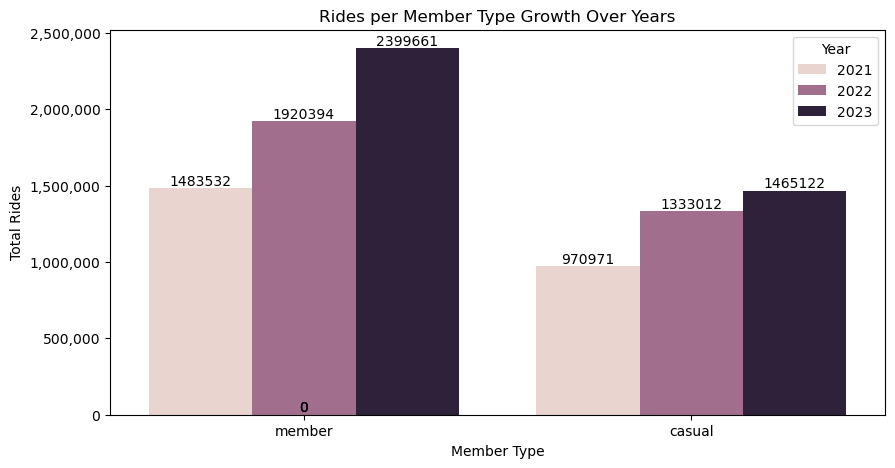

In [15]:
from matplotlib.ticker import FuncFormatter
# Create the countplot
plt.figure(figsize=(10, 5))
plt.title('Rides per Member Type Growth Over Years')
# Create the countplot
ax = sns.countplot(data=df, x='member_casual', hue='year')

# Annotate the count values (y-axis numbers) on top of the bars
for p in ax.patches:
    # Get the height of each bar (this is the count)
    height = p.get_height()

    # Get the x position of the bar (center of the bar)
    x_position = p.get_x() + p.get_width() / 2

    # Place the count value above the bar
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Member Type')
plt.ylabel('Total Rides')
plt.legend(title='Year', loc='upper right')
# Use FuncFormatter to format the y-axis to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Add commas for thousands separation

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

In [16]:
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Month,year,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,Season
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,January,2021,0,0,1,Friday,0,1520.0,Night,Winter
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,January,2021,0,0,1,Friday,0,853.0,Night,Winter


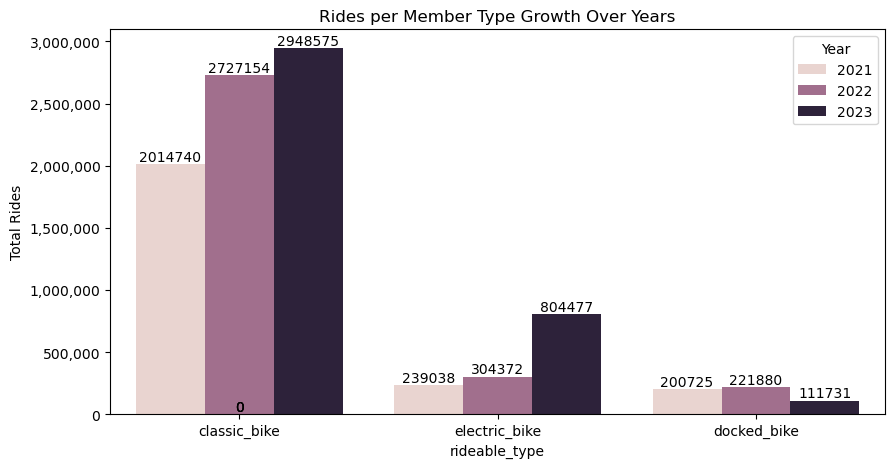

In [19]:
plt.figure(figsize=(10, 5))
plt.title('Rides per Member Type Growth Over Years')
ax = sns.countplot(data=df, x='rideable_type', hue='year')
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('rideable_type')
plt.ylabel('Total Rides')
plt.legend(title='Year', loc='upper right')
def format_func(value, tick_number):
    return f'{int(value):,}' 

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

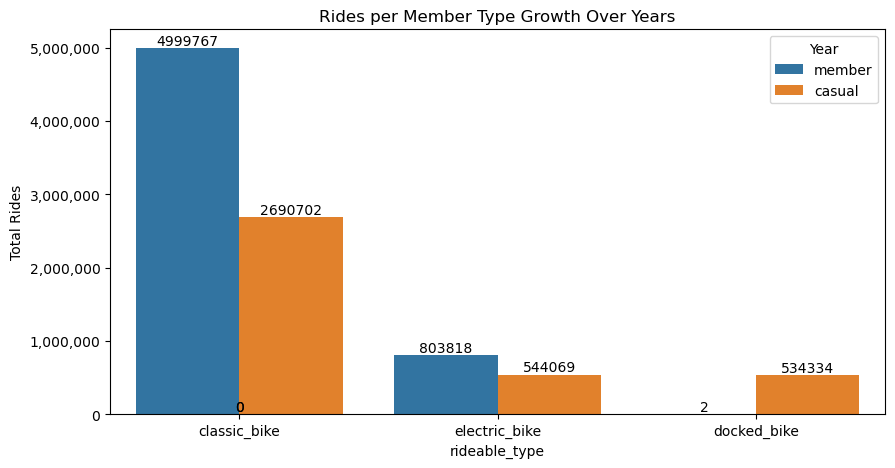

In [18]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(10, 5))
plt.title('Rides per Member Type Growth Over Years')

ax = sns.countplot(data=df, x='rideable_type', hue='member_casual')
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('rideable_type')
plt.ylabel('Total Rides')
plt.legend(title='Year', loc='upper right')
def format_func(value, tick_number):
    return f'{int(value):,}' 

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()